<a href="https://colab.research.google.com/github/PavelYakimov/dpo-cv/blob/main/Day%206%20-%20Morphological.%20VideoStreams.%20Hough/Day_6_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

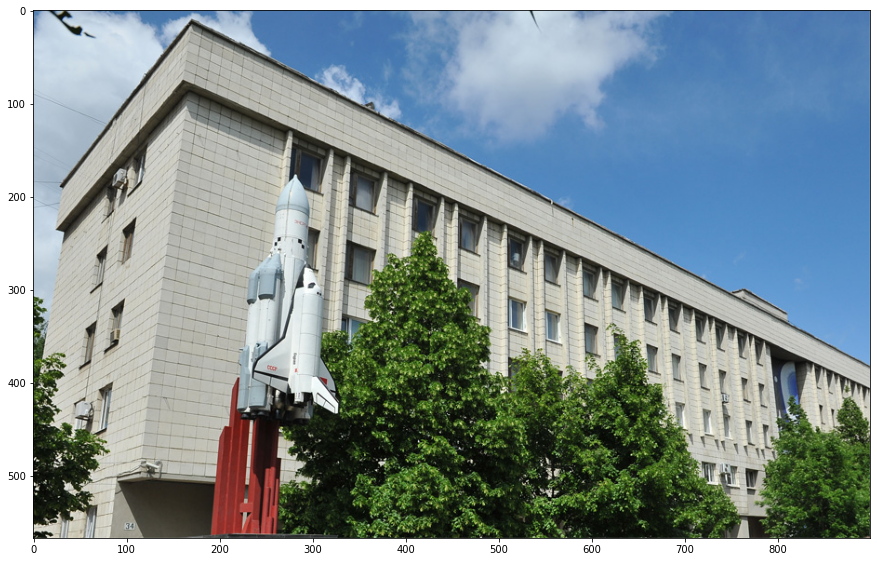

In [ ]:
import cv2
import matplotlib.pyplot as plt

imageBGR = cv2.imread('SSAU.jpg')
imageRGB = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
plt.imshow(imageRGB)
plt.show()

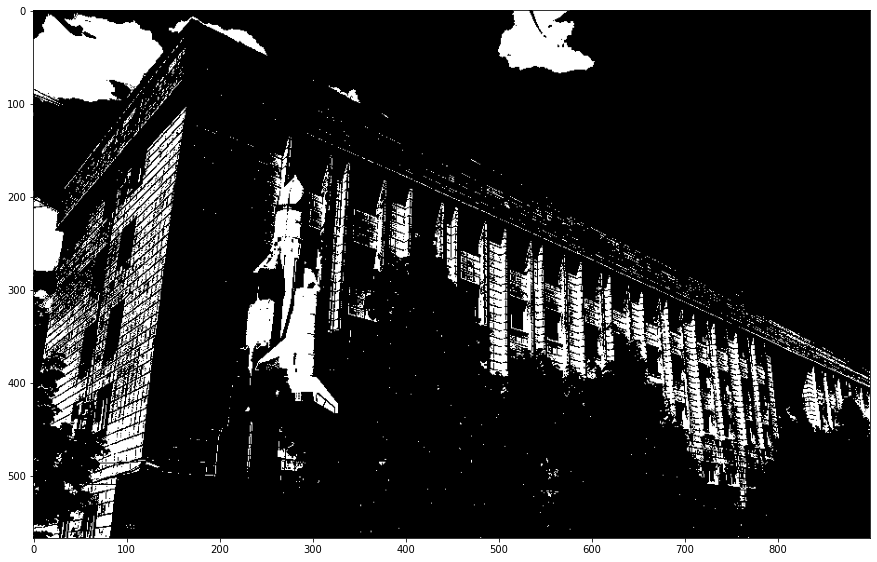

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
imageGray = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(imageGray, 200, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15,15))
plt.imshow(binary, cmap='gray')
plt.show()


In [ ]:
def custom_imshow(image, size, cmap='gray'):
  plt.figure(figsize=(size,size))
  plt.imshow(image, cmap)
  plt.show()

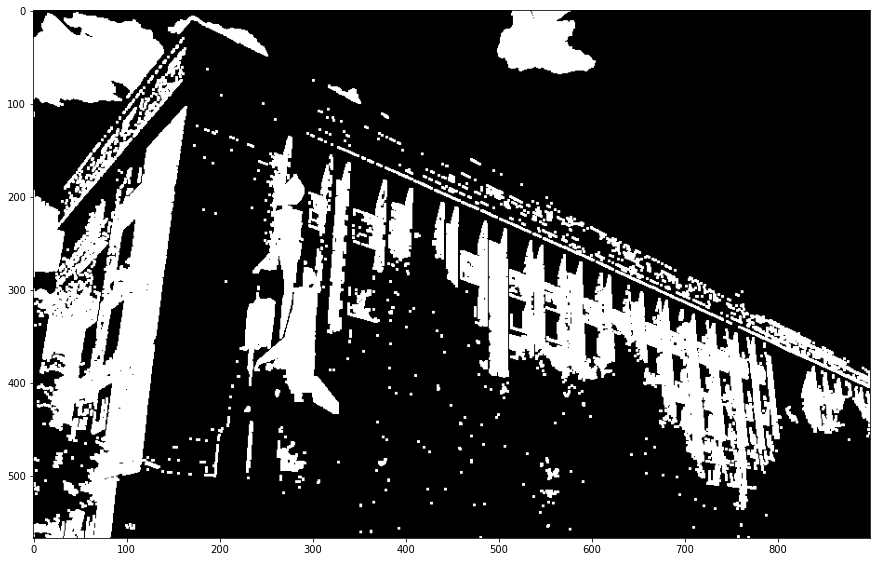

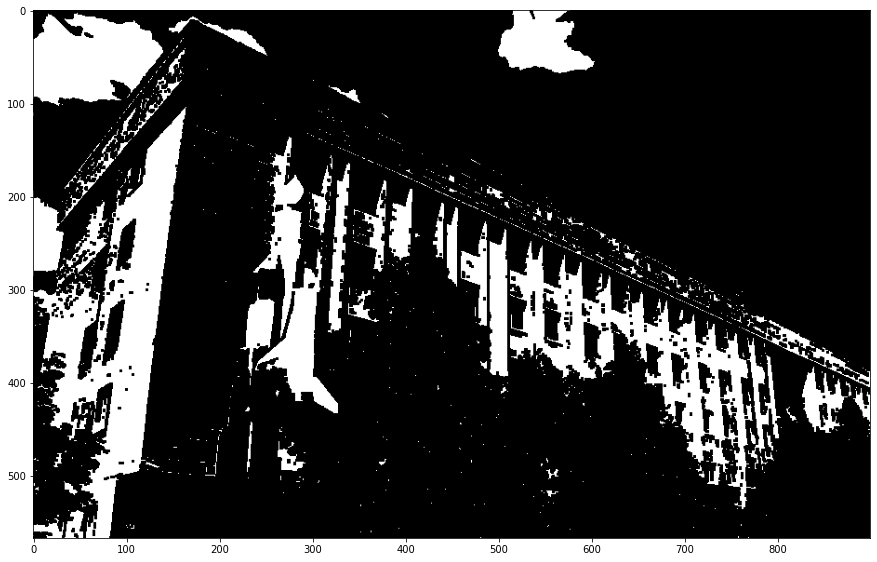

In [ ]:
import numpy as np
# dilate, erode
kernel = np.ones((3,3),np.uint8) # cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
dilated = cv2.dilate(binary, kernel, iterations = 1)

custom_imshow(dilated, 15)

eroded = cv2.erode(dilated, kernel, iterations = 1)
custom_imshow(eroded, 15)

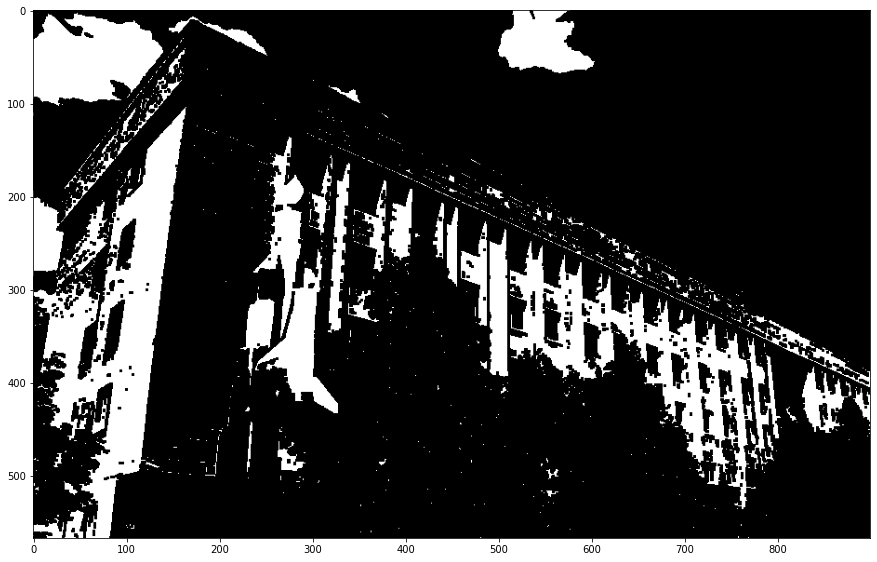

In [ ]:
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
custom_imshow(closed, 15)

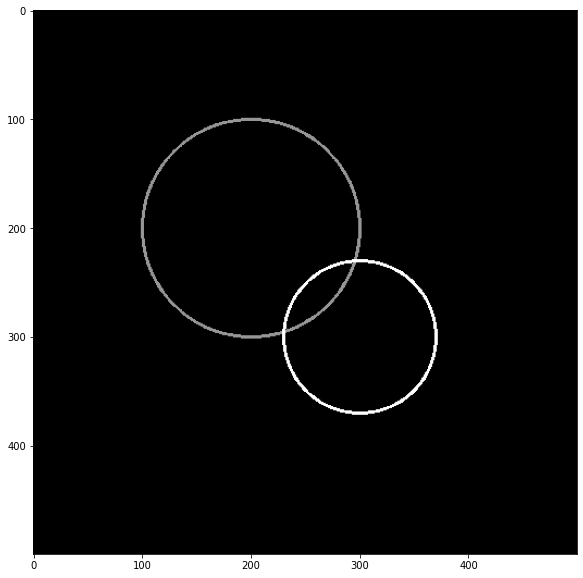

In [ ]:
testImage = np.zeros((500,500), dtype=np.uint8)
cv2.circle(testImage, (200,200), 100, (150), 2)
cv2.circle(testImage, (300,300), 70, (255), 2)
custom_imshow(testImage, 10)

In [ ]:
def ourHoughCircles(testImage):
  img = cv2.medianBlur(testImage,5)
  custom_imshow(img, 10)
  cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
  circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20, 
                            param1=50,param2=30,minRadius=65,maxRadius=105)
  circles = np.uint16(np.around(circles))
  print(circles)
  for i in circles[0,:]:
      # draw the outer circle
      cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
      # draw the center of the circle
      cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
  return circles

custom_imshow(cimg, 10)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


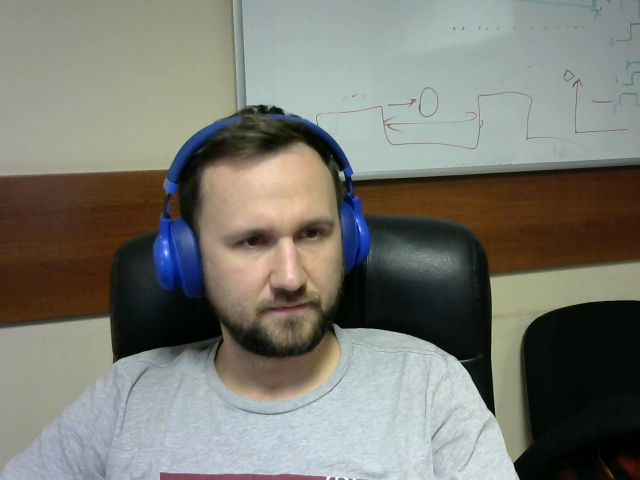

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))